In [8]:
# Import necessary libraries
# Load sample breast cancer dataset
from sklearn.datasets import load_breast_cancer 
# KNN Classifier for classification
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor  
# Metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix 
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  # For feature scaling
import pandas as pd  # Data manipulation library
import matplotlib.pyplot as plt  # For plotting graphs

# Load the breast cancer dataset from sklearn
cancer = load_breast_cancer()

In [10]:
# Create a DataFrame from the breast cancer data for better visualization
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target  
# Add target (malignant or benign) to the dataframe

# Define the features (X) and target (y) from the dataset
X = cancer.data  # X --> features (all the columns except target)
y = cancer.target  # y --> target (cancer outcome: malignant or benign)

# Split the dataset into training and testing sets, 
# with 30% of data used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.3, random_state = 42)

In [11]:
# Feature scaling using StandardScaler
# Fit on the training data and transform both training and test data
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)  

In [12]:
# Create a KNN classifier model with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model using the training data (features and target)
# Fit the KNN algorithm using the scaled training data
knn.fit(X_train, y_train)  

# Test the trained model by predicting the outcomes on the test data
y_pred = knn.predict(X_test)  # Predict using the test features

In [13]:
# Evaluate the model using accuracy score
acc = accuracy_score(y_test, y_pred)  
# Calculate accuracy by comparing predictions with true labels
print("Accuracy: ", acc)

Accuracy:  0.9590643274853801


In [14]:
# Confusion matrix to better understand the classification performance
conf_mat = confusion_matrix(y_test, y_pred)  # Create a confusion matrix
print("Confusion Matrix: ")
print(conf_mat)

Confusion Matrix: 
[[ 59   4]
 [  3 105]]


In [15]:
# Hyperparameter tuning - testing different 'k' values to 
# find the best number of neighbors

accu_values = []  # List to store accuracy for each k value
k_values = []  # List to store corresponding k values

# Loop through k values from 1 to 20 and evaluate model performance for each k
for k in range(1, 21):
    # Create KNN classifier with k neighbors
    knn2 = KNeighborsClassifier(n_neighbors=k)  
    knn2.fit(X_train, y_train)  # Train the model
    y_pred2 = knn2.predict(X_test)  # Predict on the test data
    accu = accuracy_score(y_test, y_pred2)  # Calculate accuracy
    accu_values.append(accu)  # Store accuracy
    k_values.append(k)  # Store the k value

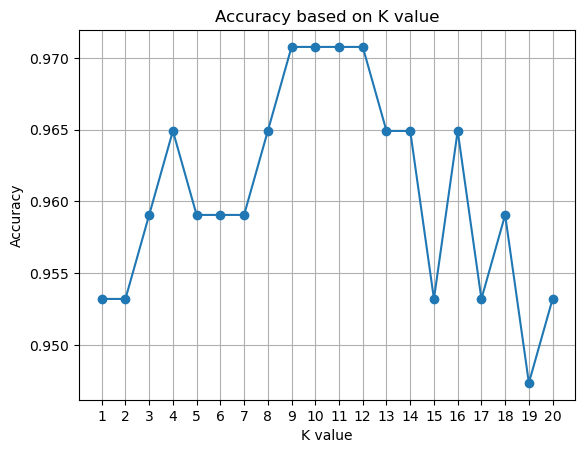

In [16]:
# Plot the accuracy values against different k values
plt.figure() # Plot line with markers
plt.plot(k_values, accu_values, marker="o", linestyle="-")  
plt.title("Accuracy based on K value")  # Set the plot title
plt.xlabel("K value")  # Label for x-axis
plt.ylabel("Accuracy")  # Label for y-axis
plt.xticks(k_values)  # Set the x-axis ticks to show k values
plt.grid(True)  # Enable grid on the plot
plt.show()  # Show the plot

In [17]:
# %% KNN REGRESSION

# Import necessary libraries for KNN regression
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting

# Generate 40 random X values (sorted) between 0 and 5
X = 5 * np.sort(np.random.rand(40, 1), axis=0)  # Generate sorted random data

In [18]:
# Generate corresponding y values using sine function, and flatten the array
y = np.sin(X).ravel()

In [19]:
# Add some noise to the data every 5th point to make the data more irregular
y[::5] += 1 * (0.5 - np.random.rand(8))

In [20]:
# Create a range of test values from 0 to 5, divided into 500 points
T = np.linspace(0, 5, 500)[:, np.newaxis]

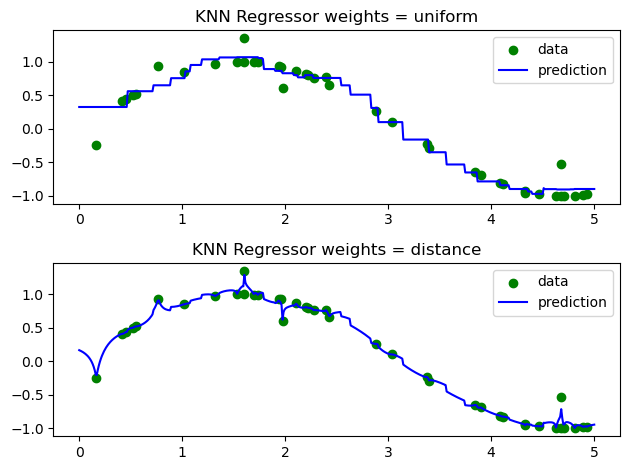

In [21]:
# Loop over two different weight functions: "uniform" and "distance"
for i, weight in enumerate(["uniform", "distance"]):
    # Create a KNN Regressor model with 5 neighbors
    knn = KNeighborsRegressor(n_neighbors=5, weights=weight)
    
    # Train the model and predict using the test points T
    y_pred = knn.fit(X, y).predict(T)
    
    # Create subplot (2 rows, 1 column), and select the i-th plot
    plt.subplot(2, 1, i+1)
    
    # Scatter plot of the original data
    plt.scatter(X, y, color="green", label="data")
    
    # Line plot of the predicted data
    plt.plot(T, y_pred, color="blue", label="prediction")
    
    # Set tight axis limits
    plt.axis("tight")
    
    # Add legend
    plt.legend()
    
    # Set the title based on the weight type
    plt.title(f"KNN Regressor weights = {weight}")

# Adjust layout so that subplots don't overlap
plt.tight_layout()

# Show the plot
plt.show()